<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%203/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Data Analysis with Python

Estimated time needed: **30** minutes

## Objectives

After completing this lab you will be able to:

*   Explore features or charecteristics to predict price of car


<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="https://#import_data">Import Data from Module</a></li>
    <li><a href="https://#pattern_visualization">Analyzing Individual Feature Patterns using Visualization</a></li>
    <li><a href="https://#discriptive_statistics">Descriptive Statistical Analysis</a></li>
    <li><a href="https://#basic_grouping">Basics of Grouping</a></li>
    <li><a href="https://#correlation_causation">Correlation and Causation</a></li>
    <li><a href="https://#anova">ANOVA</a></li>
</ol>

</div>

<hr>


<h3>What are the main characteristics that have the most impact on the car price?</h3>


<h2 id="import_data">1. Import Data from Module 2</h2>


<h4>Setup</h4>


you are running the lab in your  browser, so we will install the libraries using `piplite`


In [1]:
#you are running the lab in your  browser, so we will install the libraries using ``piplite``
# import piplite
# await piplite.install(['pandas'])
# await piplite.install(['matplotlib'])
# await piplite.install(['scipy'])
# await piplite.install(['seaborn'])


Import libraries:


If you run the lab locally using Anaconda, you can load the correct library and versions by uncommenting the following:


In [2]:
#If you run the lab locally using Anaconda, you can load the correct library and versions by uncommenting the following:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3
#! mamba install numpy=1.21.2
#! mamba install scipy=1.7.1-y
#!  mamba install seaborn=0.9.0-y

In [3]:
import pandas as pd
import numpy as np

This function will download the dataset into your browser


In [4]:
#This function will download the dataset into your browser 
#
# from pyodide.http import pyfetch
#
# async def download(url, filename):
#     response = await pyfetch(url)
#     if response.status == 200:
#         with open(filename, "wb") as f:
#             f.write(await response.bytes())


Load the data and store it in dataframe `df`:


In [5]:
path='clean_df.csv'

\#you will need to download the dataset; if you are running locally, please comment out the following
await download(path, "auto.csv")
path="auto.csv"


In [6]:
# await download(path, "auto.csv")
# filename="auto.csv"

In [7]:
df = pd.read_csv(path)
df.head()

,Age,AgeGroup,MaritalStatus,Lifestyle,Sleep,Category,Depression,Hyperlipidemia,Smoking,Diabetes,...,SK,SKReact,Reaction,Mortality,FollowUp,Thalach-binned,Gender-female,Gender-male,Locality-rural,Locality-urban
0,45,41-50,MARRIED,False,False,FREE,True,True,False,1,...,1,NO,0,0,60,Medium,1,0,1,0
1,51,51-60,MARRIED,False,False,FREE,True,True,False,0,...,1,NO,0,0,15,Medium,1,0,0,1
2,55,51-60,MARRIED,True,True,FREE,True,True,False,1,...,1,NO,0,0,6,Medium,1,0,1,0
3,55,51-60,MARRIED,True,True,FREE,True,True,False,1,...,1,NO,0,0,52,Medium,1,0,1,0
4,56,51-60,MARRIED,True,False,FREE,True,True,False,1,...,1,NO,0,0,34,Medium,1,0,1,0


Let’s set number of digits in float type.

In [8]:
pd.options.display.float_format = '{:.2f}'.format

<h2 id="pattern_visualization">2. Analyzing Individual Feature Patterns Using Visualization</h2>


To install Seaborn we use pip, the Python package manager.


Import visualization packages "Matplotlib" and "Seaborn". Don't forget about "%matplotlib inline" to plot in a Jupyter notebook.


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<h4>How to choose the right visualization method?</h4>
<p>When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.</p>


In [10]:
# list the data types for each column
print(df.dtypes)

Age                   int64
AgeGroup             object
MaritalStatus        object
Lifestyle              bool
Sleep                  bool
Category             object
Depression             bool
Hyperlipidemia         bool
Smoking                bool
Diabetes              int64
HTN                    bool
Allergies              bool
BP                  float64
Thrombolysis          int64
BGR                   int64
CPK                   int64
CK-MB                 int64
ESR                   int64
WBC                   int64
RBC                 float64
Hemoglobin          float64
PCV                 float64
MCV                 float64
MCH                 float64
MCHC                float64
PlateletCount         int64
Neutrophil          float64
Lymphocyte          float64
Monocyte            float64
Eosinophil            int64
Others               object
CO                   object
Diagnosis            object
Hypersensitivity       bool
CP                    int64
Trestbps            

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h3>Question  #1:</h3>

<b>What is the data type of the column "BP"? </b>

</div>


In [11]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
df['BP'].dtypes
```

</details>


For example, we can calculate the correlation between variables  of type "int64" or "float64" using the method "corr":


In [12]:
corr = df.corr()
corr

,Age,Lifestyle,Sleep,Depression,Hyperlipidemia,Smoking,Diabetes,HTN,Allergies,BP,...,Thal,Num,SK,Reaction,Mortality,FollowUp,Gender-female,Gender-male,Locality-rural,Locality-urban
Age,1.00,0.02,-0.01,0.07,-0.02,-0.18,0.23,0.15,-0.10,-0.03,...,-0.26,0.12,-0.08,-0.29,-0.10,0.17,0.40,-0.40,0.26,-0.26
Lifestyle,0.02,1.00,0.27,0.08,0.19,0.14,0.05,0.01,-0.21,0.07,...,0.11,0.09,0.15,-0.00,-0.03,0.01,0.03,-0.03,0.45,-0.45
Sleep,-0.01,0.27,1.00,-0.01,0.08,-0.04,0.21,0.06,-0.14,0.03,...,0.03,-0.16,0.10,0.01,0.06,-0.04,0.03,-0.03,0.08,-0.08
Depression,0.07,0.08,-0.01,1.00,0.68,0.23,-0.03,0.01,0.04,0.16,...,-0.11,0.05,-0.03,-0.04,0.05,-0.15,0.09,-0.09,0.14,-0.14
Hyperlipidemia,-0.02,0.19,0.08,0.68,1.00,0.30,-0.01,-0.09,0.05,0.11,...,-0.08,0.03,0.46,-0.14,0.02,-0.34,0.15,-0.15,0.21,-0.21
Smoking,-0.18,0.14,-0.04,0.23,0.30,1.00,-0.27,-0.33,0.13,0.16,...,0.10,-0.05,0.14,0.54,-0.16,-0.01,-0.57,0.57,0.02,-0.02
Diabetes,0.23,0.05,0.21,-0.03,-0.01,-0.27,1.00,0.65,0.19,0.01,...,-0.09,-0.01,0.12,-0.43,0.32,-0.05,0.49,-0.49,0.10,-0.10
HTN,0.15,0.01,0.06,0.01,-0.09,-0.33,0.65,1.00,0.16,-0.05,...,-0.07,0.15,-0.12,-0.28,0.18,-0.04,0.31,-0.31,0.02,-0.02
Allergies,-0.10,-0.21,-0.14,0.04,0.05,0.13,0.19,0.16,1.00,0.11,...,-0.10,0.02,0.02,0.10,-0.05,0.05,-0.06,0.06,-0.10,0.10
BP,-0.03,0.07,0.03,0.16,0.11,0.16,0.01,-0.05,0.11,1.00,...,-0.08,-0.06,0.00,0.12,-0.04,0.16,-0.07,0.07,-0.39,0.39


 Let's take a look on correlation heatmap of our data:

<AxesSubplot: >

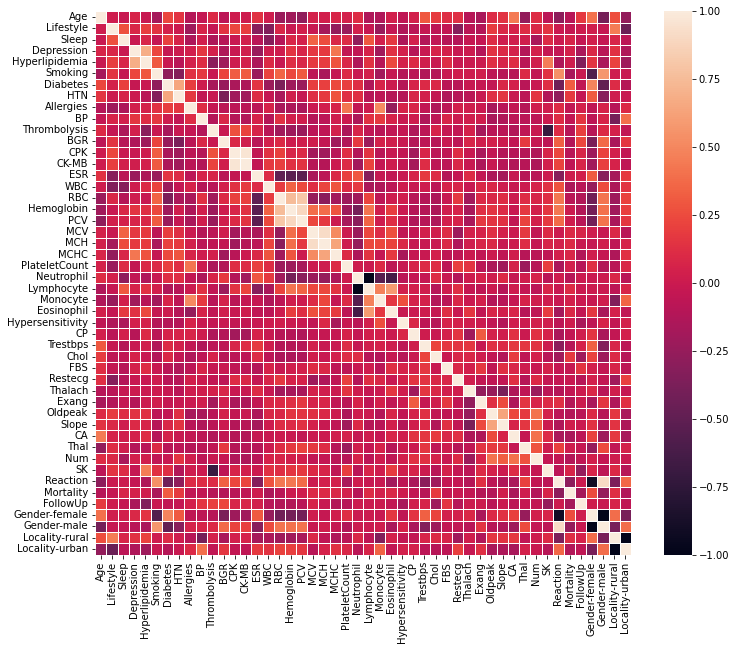

In [13]:
plt.figure(figsize = (12,10))
sns.heatmap(corr, linewidths=.5)

To see the relationship between mortality and variables of string or category type we can use <code>dython.nominal.associations</code>. This method calculates the correlation/strength-of-association of features in data-set with both categorical and continuous features using: * Pearson's R for continuous-continuous cases * Correlation Ratio for categorical-continuous cases * Cramer's V or Theil's U for categorical-categorical cases.

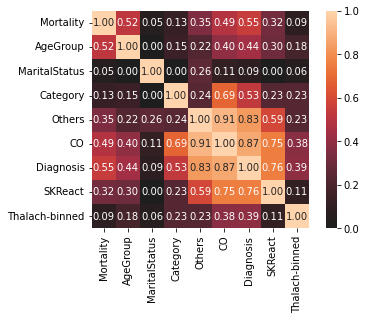

{'corr':                 Mortality  AgeGroup  MaritalStatus  Category  Others   CO  \
 Mortality            1.00      0.52           0.05      0.13    0.35 0.49   
 AgeGroup             0.52      1.00           0.00      0.15    0.22 0.40   
 MaritalStatus        0.05      0.00           1.00      0.00    0.26 0.11   
 Category             0.13      0.15           0.00      1.00    0.24 0.69   
 Others               0.35      0.22           0.26      0.24    1.00 0.91   
 CO                   0.49      0.40           0.11      0.69    0.91 1.00   
 Diagnosis            0.55      0.44           0.09      0.53    0.83 0.87   
 SKReact              0.32      0.30           0.00      0.23    0.59 0.75   
 Thalach-binned       0.09      0.18           0.06      0.23    0.23 0.38   
 
                 Diagnosis  SKReact  Thalach-binned  
 Mortality            0.55     0.32            0.09  
 AgeGroup             0.44     0.30            0.18  
 MaritalStatus        0.09     0.00            0

In [14]:
from dython.nominal import associations
associations(df[['Mortality', 'AgeGroup', 'MaritalStatus', 'Category', 'Others', 'CO', 'Diagnosis', 'SKReact', 'Thalach-binned']])

The diagonal elements are always one; we will study correlation more precisely Pearson correlation in-depth at the end of the notebook.


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h3> Question  #2: </h3>

<p>Find the correlation between the following columns: BP, Trestbps, Eosinophil, and Monocyte.</p>
<p>Hint: if you would like to select those columns, use the following syntax: df[['BP', 'Trestbps', 'Eosinophil', 'Monocyte']]</p>
</div>


In [15]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
df[['BP', 'Trestbps', 'Eosinophil', 'Monocyte']].corr()
```

</details>


<h2>Continuous Numerical Variables:</h2> 

<p>Continuous numerical variables are variables that may contain any value within some range. They can be of type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.</p>

<p>In order to start understanding the (linear) relationship variables, we can use "regplot" which plots the scatterplot plus the fitted regression line for the data.</p>


We have chosen "Mortality" column to predict, but it only has two values: 1 and 0. Because of that, we need to choose continuous numerical variables to show examples of plots. Let's see several examples of different linear relationships:


<h3>Positive Linear Relationship</h4>


Let's find the scatterplot of "CPK" and "CK-MB".


(0.0, 529.55)

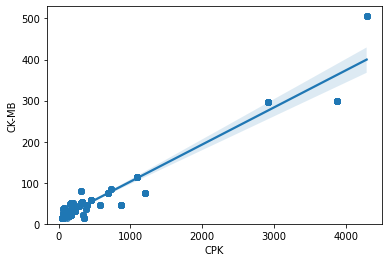

In [16]:
# Engine size as potential predictor variable of price
sns.regplot(x="CPK", y="CK-MB", data=df)
plt.ylim(0,)

<p>As the CK-MB goes up, the CPK goes up: this indicates a positive direct correlation between these two variables. CPK seems like a pretty good predictor of CK-MB since the regression line is almost a perfect diagonal line. So in the future labs we can merge this variables.</p>


We can examine the correlation between 'CPK' and 'CK-MB' and see that it's approximately 0.96.


In [17]:
df[['CPK', 'CK-MB']].corr()

,CPK,CK-MB
CPK,1.00,0.96
CK-MB,0.96,1.00


Neutrophils is a potential predictor variable of lymphocytes. Let's find the scatterplot of "Neutrophil" and "Lymphocyte".


<AxesSubplot: xlabel='Neutrophil', ylabel='Lymphocyte'>

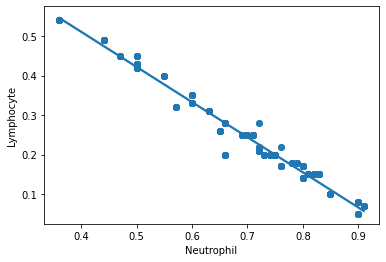

In [18]:
sns.regplot(x="Neutrophil", y="Lymphocyte", data=df)

<p>As Neutrophils goes up, the lymphocytes goes down: this indicates an inverse/negative relationship between these two variables. Neutrophils could potentially be a predictor of lymphocytes.</p>


We can examine the correlation between 'Neutrophil' and 'Lymphocyte' and see it's approximately -0.99.


In [19]:
df[['Neutrophil', 'Lymphocyte']].corr()

,Neutrophil,Lymphocyte
Neutrophil,1.00,-0.99
Lymphocyte,-0.99,1.00


<h3>Weak Linear Relationship</h3>


Let's see if "Chol" is a predictor variable of "Lymphocyte".


<AxesSubplot: xlabel='Chol', ylabel='Lymphocyte'>

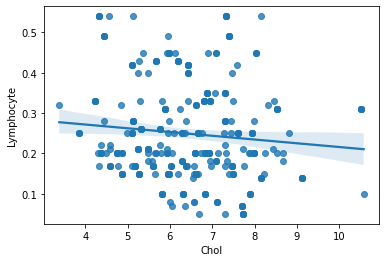

In [20]:
sns.regplot(x="Chol", y="Lymphocyte", data=df)

<p>Cholesterol does not seem like a good predictor of the lymphocytes at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore, it's not a reliable variable.</p>


We can examine the correlation between 'CHol' and 'Lymphocyte' and see it's approximately -0.1.


In [21]:
df[['Chol', 'Lymphocyte']].corr()

,Chol,Lymphocyte
Chol,1.00,-0.10
Lymphocyte,-0.10,1.00


 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  3 a): </h1>

<p>Find the correlation  between x="BP" and y="Trestbps".</p>
<p>Hint: if you would like to select those columns, use the following syntax: df[["BP","Trestbps"]].  </p>
</div>


In [22]:
# Write your code below and press Shift+Enter to execute


<details><summary>Click here for the solution</summary>

```python

#The correlation is -0.13, the non-diagonal elements of the table.

df[["BP", "Trestbps"]].corr()

```

</details>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  3 b):</h1>

<p>Given the correlation results between "BP" and "Trestbps", do you expect a linear relationship?</p>
<p>Verify your results using the function "regplot()".</p>
</div>


In [23]:
# Write your code below and press Shift+Enter to execute


<details><summary>Click here for the solution</summary>

```python

#There is a weak correlation between the variable 'BP' and 'Trestbps.' as such regression will not work well. We can see this using "regplot" to demonstrate this.

#Code: 
sns.regplot(x="BP", y="Trestbps", data=df)

```

</details>


<h3>Categorical Variables</h3>

<p>These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots. As an example, to see different cases we will compare numerical variables not only with 'Mortality', because it doesn't have strong correlation with other columns.</p>


Let's look at the relationship between "Mortality" and "Hemoglobin".


<AxesSubplot: xlabel='Mortality', ylabel='Hemoglobin'>

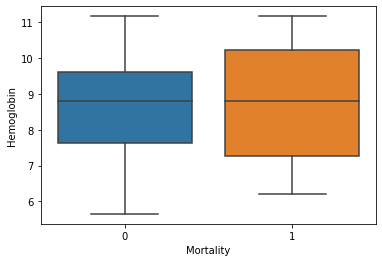

In [24]:
sns.boxplot(x="Mortality", y="Hemoglobin", data=df)

<p>We see that the distributions of hemoglobin between the different categories have a significant overlap, so hemoglobin would not be a good predictor of mortality. Let's examine engine "SKReact" and "RBC":</p>


<AxesSubplot: xlabel='RBC', ylabel='SKReact'>

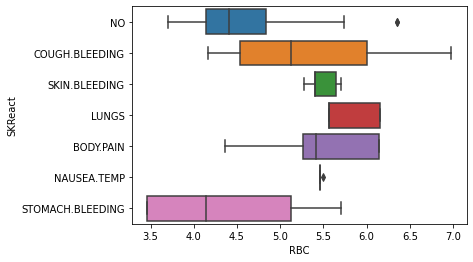

In [25]:
sns.boxplot(x="RBC", y="SKReact", data=df, orient='h')

<p>Here we see that the distribution of RBC (eritrocite count) between people who have different reaction to streptokinaze are distinct enough to take RBC as a potential good predictor of SK reaction.</p>


Let's examine "Smoking" and "Hemoglobin".


<AxesSubplot: xlabel='Smoking', ylabel='Hemoglobin'>

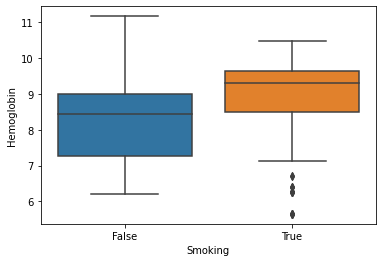

In [26]:
sns.boxplot(x="Smoking", y="Hemoglobin", data=df)

<p>Here we see that the distribution of RBC (eritrocite count) between people who smoke and don't smoke slightly differs.


<h2 id="discriptive_statistics">3. Descriptive Statistical Analysis</h2>


<p>Let's first take a look at the variables by utilizing a description method.</p>

<p>The <b>describe</b> function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.</p>

This will show:

<ul>
    <li>the count of that variable</li>
    <li>the mean</li>
    <li>the standard deviation (std)</li> 
    <li>the minimum value</li>
    <li>the IQR (Interquartile Range: 25%, 50% and 75%)</li>
    <li>the maximum value</li>
<ul>


We can apply the method "describe" as follows:


In [27]:
df.describe()

,Age,Diabetes,BP,Thrombolysis,BGR,CPK,CK-MB,ESR,WBC,RBC,...,Thal,Num,SK,Reaction,Mortality,FollowUp,Gender-female,Gender-male,Locality-rural,Locality-urban
count,368.00,368.00,368.00,368.00,368.00,368.00,368.00,368.00,368.00,368.00,...,368.00,368.00,368.00,368.00,368.00,368.00,368.00,368.00,368.00,368.00
mean,54.29,0.46,0.37,0.03,219.99,553.89,62.49,26.57,11181.28,5.09,...,5.86,2.04,0.98,0.75,0.22,28.65,0.23,0.77,0.36,0.64
std,8.72,0.50,0.22,0.18,139.34,957.61,89.79,32.58,3517.88,0.77,...,1.74,1.03,0.13,0.44,0.41,15.81,0.42,0.42,0.48,0.48
min,24.00,0.00,0.00,0.00,60.00,52.00,14.00,5.00,5800.00,3.46,...,3.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,50.75,0.00,0.18,0.00,117.00,135.00,21.00,11.00,7800.00,4.40,...,3.00,1.00,1.00,0.00,0.00,15.00,0.00,1.00,0.00,0.00
50%,55.00,0.00,0.37,0.00,164.00,188.00,36.00,16.00,10650.00,5.20,...,7.00,2.00,1.00,1.00,0.00,32.00,0.00,1.00,0.00,1.00
75%,60.25,1.00,0.55,0.00,291.00,390.00,52.00,25.00,13500.00,5.65,...,7.00,3.00,1.00,1.00,0.00,36.00,0.00,1.00,1.00,1.00
max,77.00,1.00,1.00,1.00,563.00,4289.00,505.00,154.00,19590.00,6.98,...,7.00,4.00,1.00,1.00,1.00,60.00,1.00,1.00,1.00,1.00


The default setting of "describe" skips variables of type object. We can apply the method "describe" on the variables of type 'object' as follows:


In [28]:
df.describe(include=['object'])

,AgeGroup,MaritalStatus,Category,Others,CO,Diagnosis,SKReact,Thalach-binned
count,368,368,368,368,368,368,368,368
unique,5,2,2,17,37,37,7,3
top,51-60,MARRIED,FREE,no,"Chest pain,",AC I/W M.I,COUGH.BLEEDING,Medium
freq,184,365,331,201,84,44,146,192


<h3>Value Counts</h3>


<p>Value counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column "AgeGroup". Don’t forget the method "value_counts" only works on pandas series, not pandas dataframes. As a result, we only include one bracket <code>df['AgeGroup']</code>, not two brackets <code>df[['AgeGroup']]</code>.</p>


In [29]:
df['AgeGroup'].value_counts()

51-60    184
61-70     91
41-50     61
31-40     20
21-30     12
Name: AgeGroup, dtype: int64

We can convert the series to a dataframe as follows:


In [30]:
df['AgeGroup'].value_counts().to_frame()

,AgeGroup
51-60,184
61-70,91
41-50,61
31-40,20
21-30,12


Let's repeat the above steps but save the results to the dataframe "age_group_counts" and rename the column  'AgeGroup' to 'value_counts'.


In [31]:
age_group_counts = df['AgeGroup'].value_counts().to_frame()
age_group_counts.rename(columns={'AgeGroup': 'value_counts'}, inplace=True)
age_group_counts

,value_counts
51-60,184
61-70,91
41-50,61
31-40,20
21-30,12


Now let's rename the index to 'AgeGroup':


In [32]:
age_group_counts.index.name = 'AgeGroup'
age_group_counts

,value_counts
AgeGroup,
51-60,184
61-70,91
41-50,61
31-40,20
21-30,12


We can repeat the above process for the variable 'SKReact'.


In [33]:
skreact_counts = df['MaritalStatus'].value_counts().to_frame()
skreact_counts.rename(columns={'MaritalStatus': 'value_counts'}, inplace=True)
skreact_counts.index.name = 'MaritalStatus'
skreact_counts.head(10)

,value_counts
MaritalStatus,
MARRIED,365
SINGLE,3


<p>After examining the value counts of the marital status, we see that it would not be a good predictor variable for the mortality. This is because we only have three single patients and 365 married so this result is skewed. Thus, we are not able to draw any conclusions about the marital status.</p>


<h2 id="basic_grouping">4. Basics of Grouping</h2>


<p>The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.</p>

<p>For example, let's group by the variable "AgeGroup". We see that there are 5 different categories of age.</p>


In [34]:
df['AgeGroup'].unique()

array(['41-50', '51-60', '61-70', '21-30', '31-40'], dtype=object)

<p>If we want to know, on average, which type of age groups is most valuable, we can group "AgeGroup" and then average them.</p>

<p>We can select the columns 'AgeGroup', 'SKReact' and 'Mortality', then assign it to the variable "df_group_one".</p>


In [35]:
df_group_one = df[['AgeGroup','SKReact','Mortality']]

We can then calculate the average mortality rate for each of the different categories of data.


In [36]:
df_group_one = df_group_one.groupby(['AgeGroup'],as_index=False).mean()
df_group_one

,AgeGroup,Mortality
0,21-30,0.00
1,31-40,0.40
2,41-50,0.59
3,51-60,0.03
4,61-70,0.33


<p>From our data, it seems patients of age between 41-50 have, on average, the highest mortality rate.</p>

<p>You can also group by multiple variables. For example, let's group by both 'AgeGroup' and 'SKReact'. This groups the dataframe by the unique combination of 'AgeGroup' and 'SKReact'. We can store the results in the variable 'grouped_test1'.</p>


In [37]:
# grouping results
df_gptest = df[['AgeGroup','SKReact','Mortality']]
grouped_test1 = df_gptest.groupby(['AgeGroup','SKReact'],as_index=False).mean()
grouped_test1

,AgeGroup,SKReact,Mortality
0,21-30,COUGH.BLEEDING,0.00
1,21-30,NO,0.00
2,21-30,SKIN.BLEEDING,0.00
3,21-30,STOMACH.BLEEDING,0.00
4,31-40,COUGH.BLEEDING,0.50
5,31-40,LUNGS,0.00
6,31-40,NO,0.00
7,31-40,SKIN.BLEEDING,1.00
8,41-50,BODY.PAIN,0.12
9,41-50,COUGH.BLEEDING,0.69


<p>This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot" to create a pivot table from the groups.</p>

<p>In this case, we will leave the age group variable as the rows of the table, and pivot SK reaction to become the columns of the table:</p>


In [38]:
grouped_pivot = grouped_test1.pivot(index='AgeGroup',columns='SKReact')
grouped_pivot

Mortality                                                      \
SKReact  BODY.PAIN COUGH.BLEEDING LUNGS NAUSEA.TEMP   NO SKIN.BLEEDING   
AgeGroup                                                                 
21-30          NaN           0.00   NaN         NaN 0.00          0.00   
31-40          NaN           0.50  0.00         NaN 0.00          1.00   
41-50         0.12           0.69  1.00        0.20 0.86          0.50   
51-60         0.00           0.03  0.00        0.00 0.15          0.00   
61-70         0.00           0.00  0.00        0.00 0.50          0.00   

                           
SKReact  STOMACH.BLEEDING  
AgeGroup                   
21-30                0.00  
31-40                 NaN  
41-50                 NaN  
51-60                0.00  
61-70                0.00

<p>Often, we won't have data for some of the pivot cells. We can fill these missing cells with the value 0, but any other value could potentially be used as well. It should be mentioned that missing data is quite a complex subject and is an entire course on its own.</p>


In [39]:
grouped_pivot = grouped_pivot.fillna('') #fill missing values with empty value
grouped_pivot

Mortality                                                      \
SKReact  BODY.PAIN COUGH.BLEEDING LUNGS NAUSEA.TEMP   NO SKIN.BLEEDING   
AgeGroup                                                                 
21-30                        0.00                   0.00          0.00   
31-40                        0.50  0.00             0.00          1.00   
41-50         0.12           0.69  1.00        0.20 0.86          0.50   
51-60         0.00           0.03  0.00        0.00 0.15          0.00   
61-70         0.00           0.00  0.00        0.00 0.50          0.00   

                           
SKReact  STOMACH.BLEEDING  
AgeGroup                   
21-30                0.00  
31-40                      
41-50                      
51-60                0.00  
61-70                0.00

We have a lot of 0 values because of lack of data, but we will use it as an example.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question 4:</h1>

<p>Use the "groupby" function to find the average "Mortality" of each "SKReact".</p>
</div>


In [40]:
# Write your code below and press Shift+Enter to execute


<details><summary>Click here for the solution</summary>

```python
# grouping results
df_gptest2 = df[['SKReact','Mortality']]
grouped_test_skreact = df_gptest2.groupby(['SKReact'],as_index= False).mean()
grouped_test_skreact

```

</details>


If you did not import "pyplot", let's do it again.


In [41]:
import matplotlib.pyplot as plt
%matplotlib inline 

<h4>Variables: Age group and SK reaction vs. Mortality</h4>


Let's use a heat map to visualize the relationship between Age group and SK reaction vs. Mortality.


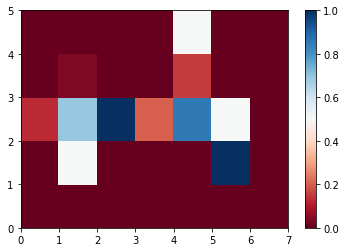

In [42]:
#use the grouped results
grouped_pivot = grouped_test1.pivot(index='AgeGroup',columns='SKReact').fillna(0)
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

<p>The heatmap plots the target variable (Mortality) proportional to colour with respect to the variables 'AgeGroup' and 'SKReact' on the vertical and horizontal axis, respectively. This allows us to visualize how the mortality is related to 'AgeGroup' and 'SKReact'.</p>

<p>The default labels convey no useful information to us. Let's change that:</p>


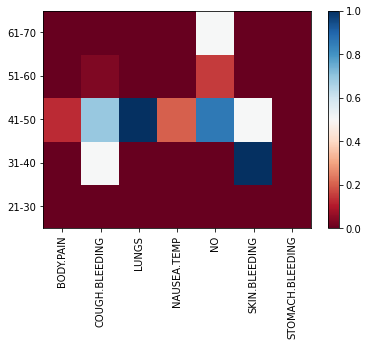

In [43]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<p>Visualization is very important in data science, and Python visualization packages provide great freedom. We will go more in-depth in a separate Python visualizations course.</p>

<p>The main question we want to answer in this module is, "What are the main characteristics which have the most impact on the mortality rate?".</p>

<p>To get a better measure of the important characteristics, we look at the assotiation of these variables with the mortality rate. In other words: how is the mortality rate dependent on this variable?</p>


<h2 id="correlation_causation">5. Correlation and Causation</h2>


<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two. Correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>


<p><b>Pearson Correlation</b></p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Perfect positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Perfect negative linear correlation.</li>
</ul>


<p>Pearson Correlation is the default method of the function "corr". Like before, we can calculate the Pearson Correlation of the of the 'int64' or 'float64'  variables.</p>


In [44]:
df.corr()

,Age,Lifestyle,Sleep,Depression,Hyperlipidemia,Smoking,Diabetes,HTN,Allergies,BP,...,Thal,Num,SK,Reaction,Mortality,FollowUp,Gender-female,Gender-male,Locality-rural,Locality-urban
Age,1.00,0.02,-0.01,0.07,-0.02,-0.18,0.23,0.15,-0.10,-0.03,...,-0.26,0.12,-0.08,-0.29,-0.10,0.17,0.40,-0.40,0.26,-0.26
Lifestyle,0.02,1.00,0.27,0.08,0.19,0.14,0.05,0.01,-0.21,0.07,...,0.11,0.09,0.15,-0.00,-0.03,0.01,0.03,-0.03,0.45,-0.45
Sleep,-0.01,0.27,1.00,-0.01,0.08,-0.04,0.21,0.06,-0.14,0.03,...,0.03,-0.16,0.10,0.01,0.06,-0.04,0.03,-0.03,0.08,-0.08
Depression,0.07,0.08,-0.01,1.00,0.68,0.23,-0.03,0.01,0.04,0.16,...,-0.11,0.05,-0.03,-0.04,0.05,-0.15,0.09,-0.09,0.14,-0.14
Hyperlipidemia,-0.02,0.19,0.08,0.68,1.00,0.30,-0.01,-0.09,0.05,0.11,...,-0.08,0.03,0.46,-0.14,0.02,-0.34,0.15,-0.15,0.21,-0.21
Smoking,-0.18,0.14,-0.04,0.23,0.30,1.00,-0.27,-0.33,0.13,0.16,...,0.10,-0.05,0.14,0.54,-0.16,-0.01,-0.57,0.57,0.02,-0.02
Diabetes,0.23,0.05,0.21,-0.03,-0.01,-0.27,1.00,0.65,0.19,0.01,...,-0.09,-0.01,0.12,-0.43,0.32,-0.05,0.49,-0.49,0.10,-0.10
HTN,0.15,0.01,0.06,0.01,-0.09,-0.33,0.65,1.00,0.16,-0.05,...,-0.07,0.15,-0.12,-0.28,0.18,-0.04,0.31,-0.31,0.02,-0.02
Allergies,-0.10,-0.21,-0.14,0.04,0.05,0.13,0.19,0.16,1.00,0.11,...,-0.10,0.02,0.02,0.10,-0.05,0.05,-0.06,0.06,-0.10,0.10
BP,-0.03,0.07,0.03,0.16,0.11,0.16,0.01,-0.05,0.11,1.00,...,-0.08,-0.06,0.00,0.12,-0.04,0.16,-0.07,0.07,-0.39,0.39


Sometimes we would like to know the significant of the correlation estimate.


<b>P-value</b>

<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the

<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>


We can obtain this information using  "stats" module in the "scipy"  library.


In [45]:
from scipy import stats

<h3>Each column vs. Mortality</h3>

Let's calculate the  Pearson Correlation Coefficient and P-value of different columns of float and int type and 'Mortality'.


In [46]:
columns = df.select_dtypes(include=['int64', 'float'])
for c in columns:
    pearson_coef, p_value = stats.pearsonr(df[c], df['Mortality'])
    print(c, ":\n  Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

Age :
  Pearson Correlation Coefficient is -0.0994898681326397  with a P-value of P = 0.056548198859325785
Diabetes :
  Pearson Correlation Coefficient is 0.3177216584080506  with a P-value of P = 4.473191261059662e-10
BP :
  Pearson Correlation Coefficient is -0.04120337192555741  with a P-value of P = 0.43065962839602884
Thrombolysis :
  Pearson Correlation Coefficient is -0.09676412496452294  with a P-value of P = 0.0636968030738315
BGR :
  Pearson Correlation Coefficient is -0.11307837392488843  with a P-value of P = 0.030097864922532337
CPK :
  Pearson Correlation Coefficient is -0.0869963017114716  with a P-value of P = 0.09564145204247276
CK-MB :
  Pearson Correlation Coefficient is -0.059391503236196054  with a P-value of P = 0.25576663018678697
ESR :
  Pearson Correlation Coefficient is 0.015142789861759945  with a P-value of P = 0.7721854542747458
WBC :
  Pearson Correlation Coefficient is -0.14533925550423935  with a P-value of P = 0.005214872580172134
RBC :
  Pearson Correl

<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between different columns and mortality is statistically significant, although the linear relationship isn't extremely strong. These columns are 'Diabetes', 'HTN', 'Chol', 'Reaction', 'FollowUp', 'Gender-male'</p>


<h2 id="anova">6. ANOVA</h2>


<h3>ANOVA: Analysis of Variance</h3>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant our calculated score value is.</p>

<p>If our price variable is strongly correlated with the variable we are analyzing, we expect ANOVA to return a sizeable F-test score and a small p-value.</p>


<h3>Age Group</h3>


<p>Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.</p>

<p>To see if different types of 'AgeHroup' impact  'Mortality', we group the data.</p>


In [47]:
grouped_test2=df_gptest[['AgeGroup', 'Mortality']].groupby(['AgeGroup'])
grouped_test2.head(2)

,AgeGroup,Mortality
0,41-50,0
1,51-60,0
2,51-60,0
13,61-70,1
14,61-70,1
25,21-30,0
26,21-30,0
27,31-40,0
28,31-40,1
31,41-50,1


In [48]:
df_gptest

,AgeGroup,SKReact,Mortality
0,41-50,NO,0
1,51-60,NO,0
2,51-60,NO,0
3,51-60,NO,0
4,51-60,NO,0
...,...,...,...
363,51-60,BODY.PAIN,0
364,51-60,STOMACH.BLEEDING,0
365,51-60,COUGH.BLEEDING,0
366,51-60,COUGH.BLEEDING,0


We can obtain the values of the method group using the method "get_group".


In [49]:
grouped_test2.get_group('21-30')['Mortality']

25     0
26     0
138    0
139    0
140    0
189    0
190    0
252    0
253    0
304    0
341    0
342    0
Name: Mortality, dtype: int64

We can use the function 'f_oneway' in the module 'stats' to obtain the <b>F-test score</b> and <b>P-value</b>.


In [50]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('21-30')['Mortality'], grouped_test2.get_group('31-40')['Mortality'], grouped_test2.get_group('41-50')['Mortality'], grouped_test2.get_group('51-60')['Mortality'], grouped_test2.get_group('61-70')['Mortality'])

print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 34.21034808415785 , P = 3.0897282069785437e-24


This is a great result with a large F-test score showing a strong correlation and a P-value of almost 0 implying almost certain statistical significance. But does this mean all five tested groups are all this highly correlated?

Let's examine them separately.


To compare pairs of groups we can use <code>itertools</code>

In [51]:
import itertools
values = ['21-30', '31-40', '41-50', '51-60', '61-70']
for a, b in itertools.combinations(values, 2):
    f_val, p_val = stats.f_oneway(grouped_test2.get_group(a)['Mortality'], grouped_test2.get_group(b)['Mortality'])
    print(a, "and", b, "ANOVA results: F=", f_val, ", P =", p_val)

21-30 and 31-40 ANOVA results: F= 7.5 , P = 0.0102798205292003
21-30 and 41-50 ANOVA results: F= 16.80657534246576 , P = 0.00010863135579495785
21-30 and 51-60 ANOVA results: F= 0.4003668883283647 , P = 0.5276449406200386
21-30 and 61-70 ANOVA results: F= 5.787044405538755 , P = 0.017963899839037213
31-40 and 41-50 ANOVA results: F= 2.2004951519818485 , P = 0.141945158683711
31-40 and 51-60 ANOVA results: F= 46.381287734445976 , P = 1.0908628171244861e-10
31-40 and 61-70 ANOVA results: F= 0.3548789657842067 , P = 0.552599132370185
41-50 and 51-60 ANOVA results: F= 168.33458838213124 , P = 1.338505800641356e-29
41-50 and 61-70 ANOVA results: F= 10.661933278398289 , P = 0.0013550567900535743
51-60 and 61-70 ANOVA results: F= 56.603574515586466 , P = 7.745141921318115e-13


Results represent that some of separately compared pairs of groups have different F and P value from other pairs. So only some of them are highly correlated.

<h3>Conclusion: Important Variables</h3>


<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting mortality from the heart failure. We have narrowed it down to the following variables:</p>

Continuous numerical variables:

<ul>
    <li>Diabetes</li>
    <li>HTN</li>
    <li>Chol</li>
    <li>Reaction</li>
    <li>FollowUp</li>
    <li>Gender-male</li>
</ul>

Categorical variables:

<ul>
    <li>AgeGroup</li>
    <li>SKReact</li>
    <li>Diagnosis</li>
    <li>CO</li>
    <li>Others</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>


### Thank you for completing this lab!

## Author

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Joseph Santarcangelo</a>

### Other Contributors

<a href="https://www.linkedin.com/in/mahdi-noorian-58219234/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Mahdi Noorian PhD</a>

Bahare Talayian

Eric Xiao

Steven Dong

Parizad

Hima Vasudevan

<a href="https://www.linkedin.com/in/fiorellawever/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Fiorella Wenver</a>

<a href="https:// https://www.linkedin.com/in/yi-leng-yao-84451275/ " target="_blank" >Yi Yao</a>.

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                 |
| ----------------- | ------- | ---------- | ---------------------------------- |
| 2020-10-30        | 2.1     | Lakshmi    | changed URL of csv                 |
| 2020-08-27        | 2.0     | Lavanya    | Moved lab to course repo in GitLab |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
